In [44]:
from parcels import FieldSet, ParticleSet, JITParticle, ParticleFile, ErrorCode
from parcels import AdvectionRK4
import numpy as np
import xarray
import xroms
from datetime import timedelta
%matplotlib inline

def DeleteParticle(particle, fieldset, time):
    particle.delete()

/Users/hetl729/miniconda3/envs/parcels/lib/python3.7/site-packages/xroms/interp.py:18: UserWarning: xESMF is not installed, so `interpll` will not run.
  warnings.warn("xESMF is not installed, so `interpll` will not run.")


In [45]:
ds = xarray.open_zarr('/Users/hetl729/Data/Frontogenesis/surface_parent_subset.zarr',
                      consolidated=True)
ds.u.load()
ds.v.load()

ds['up'] =
ds['vp'][:,:,:] = 0.3


SyntaxError: invalid syntax (<ipython-input-45-7291980bc6df>, line 6)

In [46]:
variables = {"U": "u", "V": "v"}
dimensions = {
    "U": {"lon": "lon_psi", "lat": "lat_psi", "time": "ocean_time"},
    "V": {"lon": "lon_psi", "lat": "lat_psi", "time": "ocean_time"},
}

fieldset = FieldSet.from_xarray_dataset(ds, variables, dimensions, 
                                        interp_method='cgrid_velocity',
                                        gridindexingtype='mitgcm')

# fieldset = FieldSet.from_c_grid_dataset(filenames, variables, dimensions,
#                                         interp_method='cgrid_velocity',
#                                         gridindexingtype='mitgcm')

KeyError: 'lon_psi'

In [47]:
pset = ParticleSet(fieldset=fieldset, 
                   pclass=JITParticle,
                   lon=np.linspace(-94.5, -92, 100),  
                   lat=28.25*np.ones(100))   


ValueError: operands could not be broadcast together with shapes (120,134) (119,135) 

/Users/hetl729/miniconda3/envs/parcels/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1599: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


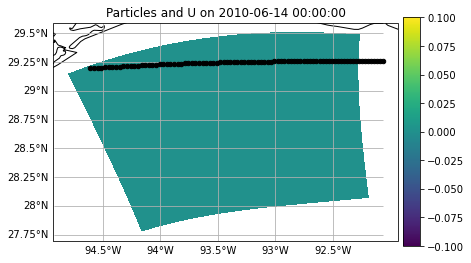

In [48]:
pset.show(field=fieldset.U)

In [49]:
output_file = pset.ParticleFile(name="EddyParticles.nc", outputdt=timedelta(hours=1))

pset.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=timedelta(minutes=5),      # the timestep of the kernel
             output_file=output_file,
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle}
            )

INFO: Temporary output files are stored in out-AZMIJBAC.
INFO: You can use "parcels_convert_npydir_to_netcdf out-AZMIJBAC" to convert these to a NetCDF file during the run.
N/A% (0 of 864000.0) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--WARNING: ParticleSet is empty on writing as array at time 1.476e+06
 40% (352800.0 of 864000.0) |####        | Elapsed Time: 0:00:00 ETA:  00:00:00WARNING: ParticleSet is empty on writing as array at time 1.4796e+06
 41% (360000.0 of 864000.0) |#####       | Elapsed Time: 0:00:00 ETA:   0:00:00WARNING: ParticleSet is empty on writing as array at time 1.4868e+06
 42% (363600.0 of 864000.0) |#####       | Elapsed Time: 0:00:00 ETA:   0:00:00WARNING: ParticleSet is empty on writing as array at time 1.4904e+06
 42% (370800.0 of 864000.0) |#####       | Elapsed Time: 0:00:00 ETA:   0:00:00WARNING: ParticleSet is empty on writing as array at time 1.4976e+06
 43% (374400.0 of 864000.0) |#####       | Elapsed Time: 0:00:00 ETA:   0:00:00WARNING: 

In [50]:
pset.show(field=fieldset.V)
# ds.salt.sel(ocean_time='06-02-2010 00:00').plot(x='lon_rho', y='lat_rho')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [37]:
ds

<xarray.Dataset>
Dimensions:     (eta_rho: 120, eta_v: 119, ocean_time: 1325, xi_rho: 135, xi_u: 134)
Coordinates: (12/14)
  * eta_rho     (eta_rho) int64 30 31 32 33 34 35 36 ... 144 145 146 147 148 149
  * eta_v       (eta_v) int64 30 31 32 33 34 35 36 ... 143 144 145 146 147 148
    lat_psi     (eta_v, xi_u) float64 dask.array<chunksize=(119, 134), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    lat_u       (eta_rho, xi_u) float64 27.79 27.8 27.8 ... 29.47 29.47 29.46
    lat_v       (eta_v, xi_rho) float64 27.8 27.8 27.81 ... 29.46 29.46 29.46
    ...          ...
    lon_u       (eta_rho, xi_u) float64 -94.15 -94.14 -94.12 ... -92.05 -92.04
    lon_v       (eta_v, xi_rho) float64 -94.16 -94.15 -94.13 ... -92.05 -92.03
  * ocean_time  (ocean_time) datetime64[ns] 2010-06-01 ... 2010-07-26T04:00:00
    s_rho       float64 -0.01667
  * xi_rho      (xi_rho) int64 270 271 272 273 274 275 ... 400 401 402 403 404
  * xi_u        (xi_u) int64 270 271 272 273 274 275 ... 398 399 400 401 402 403
Data variables:
    f           (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    h           (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    pm          (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    pn          (eta_rho, xi_rho) float64 dask.array<chunksize=(120, 135), meta=np.ndarray>
    salt        (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 120, 135), meta=np.ndarray>
    temp        (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 120, 135), meta=np.ndarray>
    u           (ocean_time, eta_rho, xi_u) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    v           (ocean_time, eta_v, xi_rho) float32 0.3 0.3 0.3 ... 0.3 0.3 0.3
Attributes: (12/30)
    CPP_options:       TXLA2_NEST, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_SP...
    Conventions:       CF-1.4, SGRID-0.3
    NLM_LBC:           \nEDGE:    WEST   SOUTH  EAST   NORTH  \nzeta:    Che ...
    ana_file:          /scratch/user/d.kobashi/source_code/COAWST/Functionals...
    bry_file_01:       /scratch/user/d.kobashi/projects/hindcasts/projects/tx...
    clm_file_01:       /scratch/user/d.kobashi/projects/hindcasts/projects/tx...
    ...                ...
    svn_rev:           Unversioned directory
    svn_url:           https:://myroms.org/svn/src
    tiling:            018x010
    title:             TXLA ROMS 2-way nesting test
    type:              ROMS/TOMS history file
    var_info:          varinfo.dat

In [38]:
ds.ocean_time

<xarray.DataArray 'ocean_time' (ocean_time: 1325)>
array(['2010-06-01T00:00:00.000000000', '2010-06-01T01:00:00.000000000',
       '2010-06-01T02:00:00.000000000', ..., '2010-07-26T02:00:00.000000000',
       '2010-07-26T03:00:00.000000000', '2010-07-26T04:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2010-06-01 ... 2010-07-26T04:00:00
    s_rho       float64 -0.01667
Attributes:
    axis:           T
    field:          time, scalar, series
    long_name:      time since initialization
    standard_name:  time

In [51]:
ls -lrt

total 697488
-rw-r--r--  1 hetl729  PNL\Domain Users       1068 Mar  2 16:07 LICENSE
-rw-r--r--  1 hetl729  PNL\Domain Users          9 Mar  2 16:07 README.md
-rw-r--r--  1 hetl729  PNL\Domain Users  343700911 Apr 30 15:02 surface_parent_subset.nc
-rw-r--r--  1 hetl729  PNL\Domain Users      61439 May  3 09:04 EddyParticles.nc
-rw-r--r--  1 hetl729  PNL\Domain Users     302837 May  3 15:49 parcels_cgrid_test.ipynb
-rw-r--r--@ 1 hetl729  PNL\Domain Users     512551 May  6 09:47 foo.mp4
drwxr-xr-x  3 hetl729  PNL\Domain Users         96 May  6 10:20 out-FDLUMDYE/
drwxr-xr-x  3 hetl729  PNL\Domain Users         96 May  6 11:13 out-TDUTAMFS/
drwxr-xr-x  3 hetl729  PNL\Domain Users         96 May  6 11:13 out-AZMIJBAC/
-rw-r--r--  1 hetl729  PNL\Domain Users     152606 May  6 11:14 TXLA_test_cgrid.ipynb
-rw-r--r--  1 hetl729  PNL\Domain Users     566331 May  6 11:14 Untitled.ipynb
